In [235]:
import pandas as pd
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7
import matplotlib.pyplot as plt

In [236]:
df_out=pd.read_csv('outcome_interview.csv')
df_ev=pd.read_csv('event_interview.csv')
df_fi=pd.read_csv('fighter_interview.csv')

In [237]:
print (df_out.shape)
print (df_ev.shape)
print (df_fi.shape)

(8371, 5)
(1612, 8)
(5529, 3)


In [238]:
df_out.head()

,id,fighter1_id,fighter2_id,winner_id,event_id
0,2264,803,138,138.0,18
1,2272,3025,466,466.0,494
2,2280,3005,1671,1671.0,375
3,2292,2110,284,284.0,352
4,2310,1346,607,1346.0,826


In [239]:
df_ev=df_ev.rename(columns={'id':'event_id'})
df_ev.head()

,event_id,name,date,promoter,location,attendance,created_at,modified_at
0,1,One FC 10: Champions and Warriors,2013-09-13,OneFC,NaN,NaN,2019-04-01T19:56:24.477518,2019-04-01T19:56:24.477518
1,2,Legacy FC 45: Todhunter vs. Smith,2015-09-11,Legacy Fc,NaN,NaN,2019-04-01T19:56:28.403410,2019-04-01T19:56:28.403410
2,3,LFA 27: Watley vs. Wilson,2017-11-10,LFA,NaN,NaN,2019-04-01T19:56:32.488043,2019-04-01T19:56:32.488043
3,4,ONE FC 21: Roar of Tigers,2014-10-17,OneFC,NaN,NaN,2019-04-01T19:56:39.395144,2019-04-01T19:56:39.395144
4,5,One FC 8: Kings and Champions,2013-04-05,OneFC,NaN,NaN,2019-04-01T19:56:39.404131,2019-04-01T19:56:39.404131


In [240]:
df_fi=df_fi.rename(columns={'id':'fighter1_id'})
df_fi.head()

,fighter1_id,name,nationality
0,111,Bertrand Amoussou,France
1,3227,Dave Zitanick,United States
2,2002,Jim Mullen,United States
3,2033,Mario Neto,Brazil
4,1667,Aaron Lanfranco,United States


## First, let's work with fighters' ids and nationalities

In [241]:
matchups=pd.merge(df_out,df_fi[['fighter1_id','name','nationality']],on='fighter1_id')
matchups=matchups.rename(columns={'name':'fighter1_name','nationality':'fighter1_nationality'})
matchups.head()

,id,fighter1_id,fighter2_id,winner_id,event_id,fighter1_name,fighter1_nationality
0,2264,803,138,138.0,18,Mike Easton,United States
1,275,803,684,684.0,319,Mike Easton,United States
2,910,803,1405,1405.0,508,Mike Easton,United States
3,2272,3025,466,466.0,494,Bobby Voelker,United States
4,3827,3025,1709,1709.0,1038,Bobby Voelker,United States


In [242]:
df_fi=df_fi.rename(columns={'fighter1_id':'fighter2_id'})
matchups=pd.merge(matchups,df_fi[['fighter2_id','name','nationality']],on='fighter2_id')
matchups=matchups.rename(columns={'name':'fighter2_name','nationality':'fighter2_nationality'})
matchups.head()

,id,fighter1_id,fighter2_id,winner_id,event_id,fighter1_name,fighter1_nationality,fighter2_name,fighter2_nationality
0,2264,803,138,138.0,18,Mike Easton,United States,Raphael Assuncao,Brazil
1,1170,2860,138,138.0,1048,Issei Tamura,Japan,Raphael Assuncao,Brazil
2,2960,472,138,138.0,442,Bryan Caraway,United States,Raphael Assuncao,Brazil
3,2604,1799,138,1799.0,107,Marlon Moraes,Brazil,Raphael Assuncao,Brazil
4,756,1799,138,138.0,1487,Marlon Moraes,Brazil,Raphael Assuncao,Brazil


## Now events' names

In [243]:
matchups=pd.merge(matchups,df_ev[['event_id','name']],on='event_id')

In [244]:
matchups=matchups.rename(columns={'name':'event_name'})
matchups.head()

,id,fighter1_id,fighter2_id,winner_id,event_id,fighter1_name,fighter1_nationality,fighter2_name,fighter2_nationality,event_name
0,2264,803,138,138.0,18,Mike Easton,United States,Raphael Assuncao,Brazil,UFC on FOX 5: Henderson vs. Diaz
1,1185,952,2429,952.0,18,Alexander Gustafsson,Sweden,Mauricio Rua,Brazil,UFC on FOX 5: Henderson vs. Diaz
2,1196,2796,2212,2796.0,18,Dennis Siver,Germany,Nam Phan,United States,UFC on FOX 5: Henderson vs. Diaz
3,1193,2721,820,820.0,18,Jeremy Stephens,United States,Yves Edwards,United States,UFC on FOX 5: Henderson vs. Diaz
4,1197,86,1342,1342.0,18,John Albert,United States,Scott Jorgensen,United States,UFC on FOX 5: Henderson vs. Diaz


In [245]:
matchups=matchups[['fighter1_name','fighter2_name','fighter1_nationality','fighter2_nationality','event_name']]
matchups.head()

,fighter1_name,fighter2_name,fighter1_nationality,fighter2_nationality,event_name
0,Mike Easton,Raphael Assuncao,United States,Brazil,UFC on FOX 5: Henderson vs. Diaz
1,Alexander Gustafsson,Mauricio Rua,Sweden,Brazil,UFC on FOX 5: Henderson vs. Diaz
2,Dennis Siver,Nam Phan,Germany,United States,UFC on FOX 5: Henderson vs. Diaz
3,Jeremy Stephens,Yves Edwards,United States,United States,UFC on FOX 5: Henderson vs. Diaz
4,John Albert,Scott Jorgensen,United States,United States,UFC on FOX 5: Henderson vs. Diaz


In [246]:
matchups.shape

(8371, 5)

In [247]:
#Export to csv
fileh=open('matchups.txt','a')
matchups.to_csv(fileh,index=True,header=True)
fileh.close()

## Fighters' nationalities distribution

In [248]:
df_fi=df_fi.rename(columns={'fighter2_id':'id'})
df_fi.head()

,id,name,nationality
0,111,Bertrand Amoussou,France
1,3227,Dave Zitanick,United States
2,2002,Jim Mullen,United States
3,2033,Mario Neto,Brazil
4,1667,Aaron Lanfranco,United States


In [249]:
df_fi['nationality'].unique()

array(['France', 'United States', 'Brazil', 'USA',
       'Iran, Islamic Republic of', nan, 'Lithuania', 'England', 'Russia',
       'Japan', 'Moldova, Republic of', 'Canada', 'New Zealand',
       'South Korea', 'Czech Republic', 'China', 'Croatia', 'Australia',
       'Dominican Republic', 'Italy', 'Poland', 'Philippines', 'Wales',
       'Mexico', 'Sweden', 'Venezuela', 'Ireland', 'India', 'Romania',
       'Germany', 'Kazakhstan', 'Bulgaria', 'Luxembourg', 'Scotland',
       'Peru', 'Ukraine', 'Northern Ireland', 'Norway', 'Finland',
       'Holland', 'Switzerland', 'Netherlands', 'Spain', 'Israel',
       'Puerto Rico', 'Latvia', 'Denmark', 'Mongolia', 'Taiwan',
       'Myanmar', 'BRAZIL', 'Costa Rica', 'Argentina', 'Jamaica',
       'Kyrgyzstan', 'South Africa', 'United states', 'Thailand',
       'Indonesia', 'Slovakia', 'Liberia', 'Georgia', 'Tajikistan',
       'Colombia', 'Guam', 'Chile', 'Estonia', 'Uzbekistan', 'Belgium',
       'Cambodia', 'Armenia', 'Congo', 'Nigeria', 'E

### There some some nans. Checking if there's duplicates and some nationalities are missing

In [250]:
df_fi.shape

(5529, 3)

In [251]:
df_fi_nan = df_fi[df_fi.isna().any(axis=1)]
df_fi_nan.head()

,id,name,nationality
10,2001,Marcelo Mello,NaN
29,3089,Erick Wanderlei,NaN
30,3048,Dimitiri Wanderley,NaN
49,1121,Luis Henrique,NaN
52,14,Royce Alger,NaN


In [252]:
df_fi_test=pd.merge(df_fi_nan,df_fi[['name','nationality']],on='name')

In [253]:
df_fi_test

,id,name,nationality_x,nationality_y
0,2001,Marcelo Mello,NaN,NaN
1,3089,Erick Wanderlei,NaN,NaN
2,3048,Dimitiri Wanderley,NaN,NaN
3,1121,Luis Henrique,NaN,NaN
4,14,Royce Alger,NaN,NaN
5,2254,Juan Puig,NaN,NaN
6,499,Donnie Chappell,NaN,NaN
7,783,Ben Earwood,NaN,NaN
8,1371,Roy Jones,NaN,NaN
9,1821,Eric Magana,NaN,NaN


### Nope, it's ok.

### There are a lot of typos in the countries' names

In [254]:
usa=['United states','USA','United States']
df_fi['nationality_2']=df_fi['nationality'].apply(lambda x: 'USA' if x in usa else x)

braz=['Brazil','BRAZIL']
df_fi['nationality_2']=df_fi['nationality_2'].apply(lambda x: 'Brazil' if x in braz else x)

fin=['Finnland','Finland']
df_fi['nationality_2']=df_fi['nationality_2'].apply(lambda x: 'Finland' if x in fin else x)

In [255]:
df_fi['nationality_2'].unique()

array(['France', 'USA', 'Brazil', 'Iran, Islamic Republic of', nan,
       'Lithuania', 'England', 'Russia', 'Japan', 'Moldova, Republic of',
       'Canada', 'New Zealand', 'South Korea', 'Czech Republic', 'China',
       'Croatia', 'Australia', 'Dominican Republic', 'Italy', 'Poland',
       'Philippines', 'Wales', 'Mexico', 'Sweden', 'Venezuela', 'Ireland',
       'India', 'Romania', 'Germany', 'Kazakhstan', 'Bulgaria',
       'Luxembourg', 'Scotland', 'Peru', 'Ukraine', 'Northern Ireland',
       'Norway', 'Finland', 'Holland', 'Switzerland', 'Netherlands',
       'Spain', 'Israel', 'Puerto Rico', 'Latvia', 'Denmark', 'Mongolia',
       'Taiwan', 'Myanmar', 'Costa Rica', 'Argentina', 'Jamaica',
       'Kyrgyzstan', 'South Africa', 'Thailand', 'Indonesia', 'Slovakia',
       'Liberia', 'Georgia', 'Tajikistan', 'Colombia', 'Guam', 'Chile',
       'Estonia', 'Uzbekistan', 'Belgium', 'Cambodia', 'Armenia', 'Congo',
       'Nigeria', 'Ecuador', 'Macedonia', 'Hungary', 'Serbia', 'Turkey'

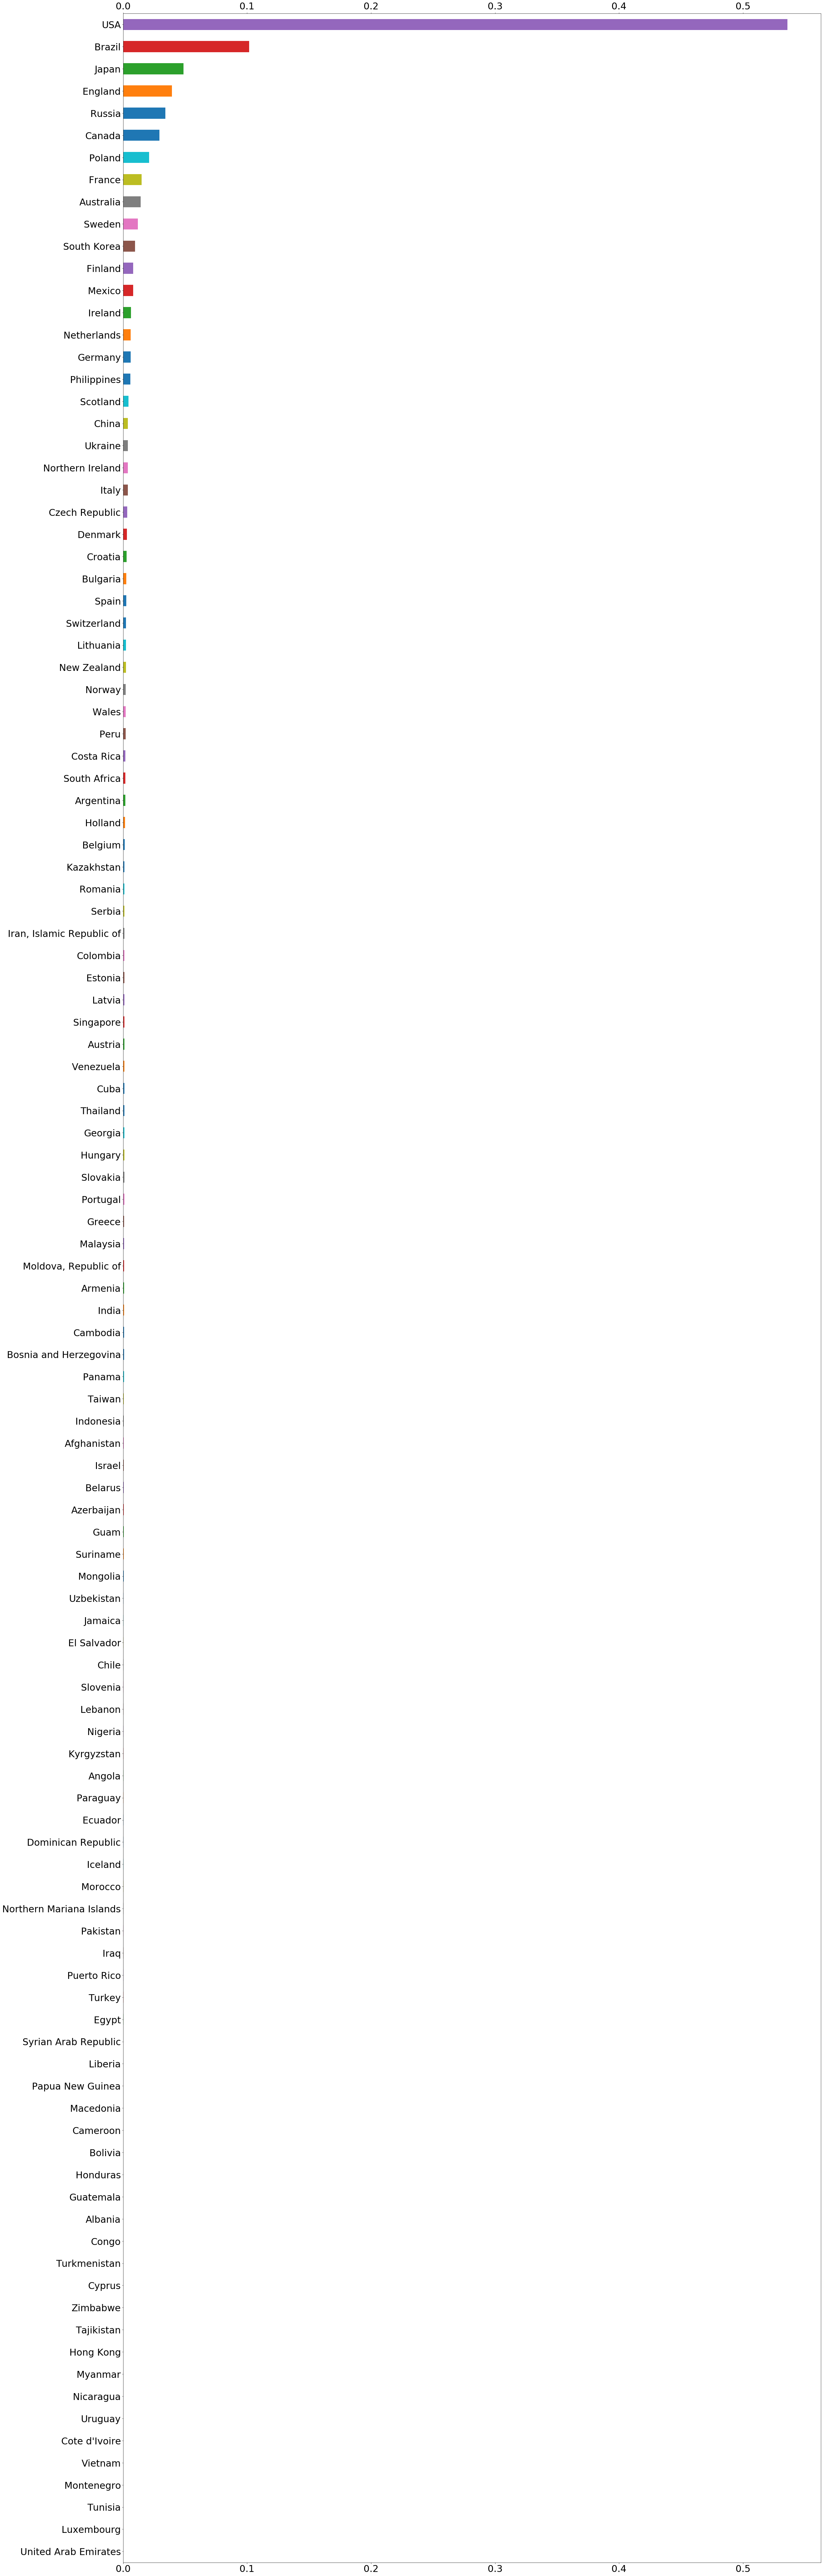

In [256]:
plt.figure(figsize=(40,150))
plt.rcParams.update({'font.size':30})
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

df_fi['nationality_2'].value_counts(ascending=True,normalize=True).plot(kind='barh')

plt.show()

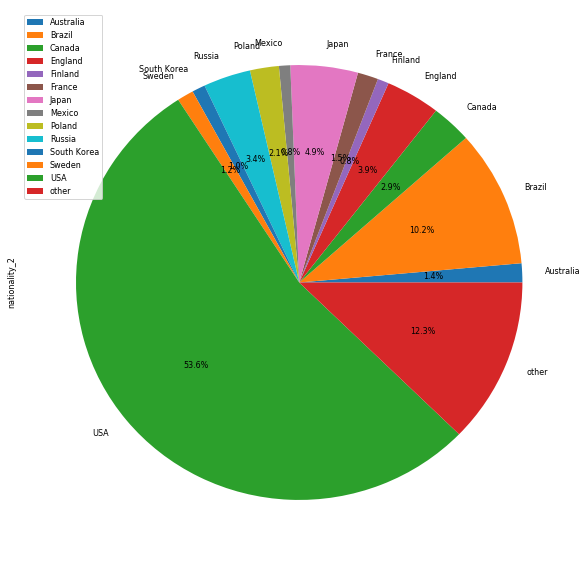

In [257]:
plt.rcParams.update({'font.size':8})
s=df_fi['nationality_2'].value_counts()
s.groupby(np.where(s>=40,s.index,'other')).sum().plot.pie(figsize=(10,10),autopct='%1.1f%%')
plt.legend(loc='upper left')